In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
filename = '../colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [3]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('planning_utils.py'))))
from planning_utils import create_grid, a_star, heuristic, read_global_home,  prune_path
from udacidrone.frame_utils import global_to_local, local_to_global

In [4]:
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5

# global_home = np.array([-122.39745, 37.79248, 0.0])
global_home = read_global_home(filename)
print(f'Global Home     => [lon, lat]   : {global_home}')

# create a grid configuration space of the obstacle data.
grid, north_offset, east_offset  = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
print(f'Grid offset : ({north_offset}, {east_offset})')
# grid_start_north = int(np.ceil(local_position[0] - north_offset))
# grid_start_east = int(np.ceil(local_position[1] - east_offset))
# print(grid_start_north, grid_start_east)
# local_position = (534, 300)


# test1
# local_start = (316.2, 445.5,0)
# local_goal = (716, 845,0)

# local_start = (716, 845)
# local_goal = (316.2, 445.5)

# test2
# local_start = (400, 100, 0 )
# local_goal = (716, 845, 0)
# local_start = (716, 845)
# local_goal = (400, 100) 

# test3
# local_start = (910, 100, 0)
# local_goal = (20, 800, 0)
# local_start = (20, 800) 
# local_goal = (910, 100)

# test3
# local_start = (910, 100)
# local_goal = (395, 900)

local_start = (395, 900, 0) 
local_goal = (910, 100, 0)

grid_start = (int(np.ceil(local_start[0])), int(np.ceil(local_start[1])))
grid_goal = (int(np.ceil(local_goal[0])), int(np.ceil(local_goal[1])))

global_start = local_to_global(local_start, global_home)
global_goal =  local_to_global(local_goal, global_home)

print(f'Grid start : {grid_start}')
print(f'Grid goal : {grid_goal}')

print(f'Global start : {global_start}')
print(f'Global goal : {global_goal}')

Global Home     => [lon, lat]   : (-122.39745, 37.79248)
Grid offset : (-316, -445)
Grid start : (395, 900)
Grid goal : (910, 100)
Global start : [-122.38719901   37.7959873     0.        ]
Global goal : [-122.3962475    37.80067575    0.        ]


In [5]:
goal_position_g = local_to_global(local_goal, global_home)
goal_position_g

array([-122.3962475 ,   37.80067575,    0.        ])

In [6]:
# g_lon0,g_lat0 =-122.402224, 37.797330 


# grid_goal_global_position = np.array([g_lon0, g_lat0, 0.147])
# grid_goal_local_position = global_to_local(grid_goal_global_position, global_home)
# grid_goal = (int(np.ceil(-north_offset + grid_goal_local_position[0])), int(np.ceil(-east_offset + grid_goal_local_position[1])))

# grid_goal_global_position = local_to_global(gird_goal_local_position, global_home)
# print(f'Global goal global Position => [lon, lat, alt]     : [{grid_goal_global_position}]')
# print(f'Goal goal Local Position => [north, east, down]     : [{grid_goal_local_position}]')
# print(f'Grid goal : {grid_goal}')
 

In [7]:
def visualize_path(g_start, g_goal, g, waypoints):
    """
    Visualize the path to get from `g_start` to `g_goal` defined by `waypoints` and the grid `g`
    """
#     path, cost = a_star(g, heuristic, grid_start, grid_goal)
#     print(f'Path cost: {cost}')
    
#     waypoints = np.array([[p[0] + n_offset, p[1] + e_offset, TARGET_ALTITUDE, 0] for p in path])
#     print(f'Waypoint count : {waypoints.shape[0]}')
    
    fig = plt.figure(figsize=(20,10))   
    plt.imshow(g, origin='lower', cmap='Greys', alpha=0.7)     


    plt.plot(waypoints[:, 1], waypoints[:, 0], 'g')    
    plt.plot(waypoints[:, 1], waypoints[:, 0], 'oc')
    plt.plot(g_start[1], g_start[0], 'r+',ms=15, mew=3)    
    plt.plot(g_goal[1], g_goal[0], 'r+', ms=15, mew=3)


    plt.xlabel('EAST')
    plt.ylabel('NORTH')
    plt.show()

Found a path.
Waypoint count : 1020


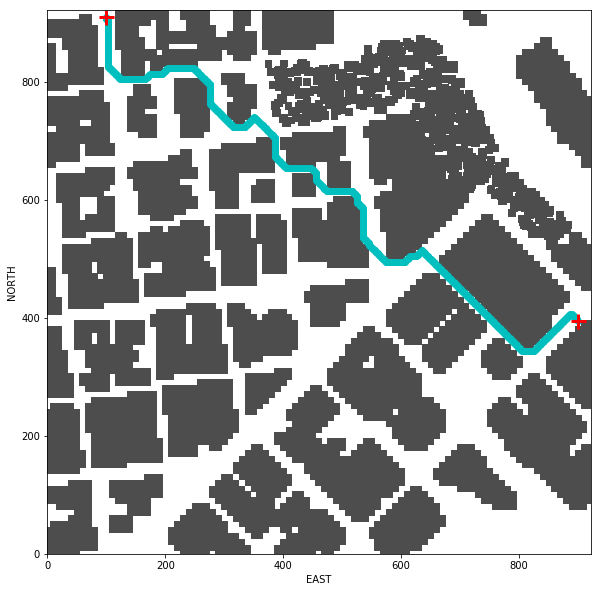

In [8]:
#Compute the lowest cost path with a_star
path, cost = a_star(grid, heuristic, grid_start, grid_goal)
# print(f'Path cost: {cost}')

# waypoints = np.array([[p[0] + north_offset, p[0] + east_offset, TARGET_ALTITUDE, 0] for p in path])
waypoints = np.array([[p[0], p[1] , TARGET_ALTITUDE, 0] for p in path])
print(f'Waypoint count : {waypoints.shape[0]}')

# print(grid_start)
# print(waypoints[0])
# print(waypoints[:, 1])
visualize_path(grid_start, grid_goal, grid, waypoints)

#### Path Pruning

36


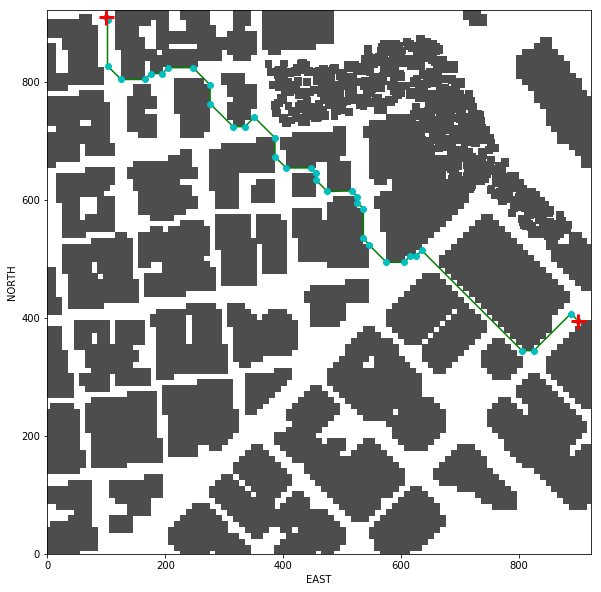

In [9]:
pruned_path = prune_path(path)
print(len(pruned_path))

pruned_waypoints =  np.array([[p[0] , p[1] , TARGET_ALTITUDE, 0] for p in pruned_path])

visualize_path(grid_start, grid_goal, grid, pruned_waypoints)